In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")
print(df.shape)
df.head()


(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [28]:
df.isnull().sum()



show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [29]:
# Fill missing categorical columns with "Unknown"
df.fillna({'director': 'Unknown', 'cast': 'Unknown', 'country': 'Unknown', 'rating': 'Unknown'}, inplace=True)

# Drop rows with missing 'date_added' (for simplicity)



In [30]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')



df['date_added'] = pd.to_datetime(df['date_added'])

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day


In [31]:
df["date_added"].isnull().sum() 

np.int64(10)

C:\Users\SC\AppData\Local\Temp\ipykernel_2396\3861336518.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




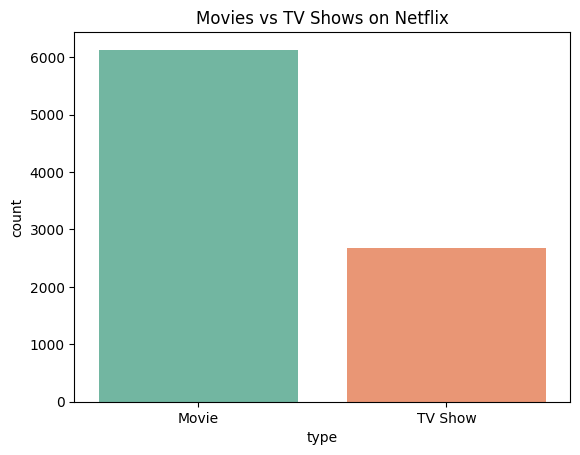

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type', data=df, palette='Set2')
plt.title("Movies vs TV Shows on Netflix")
plt.show()


C:\Users\SC\AppData\Local\Temp\ipykernel_2396\1394022655.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




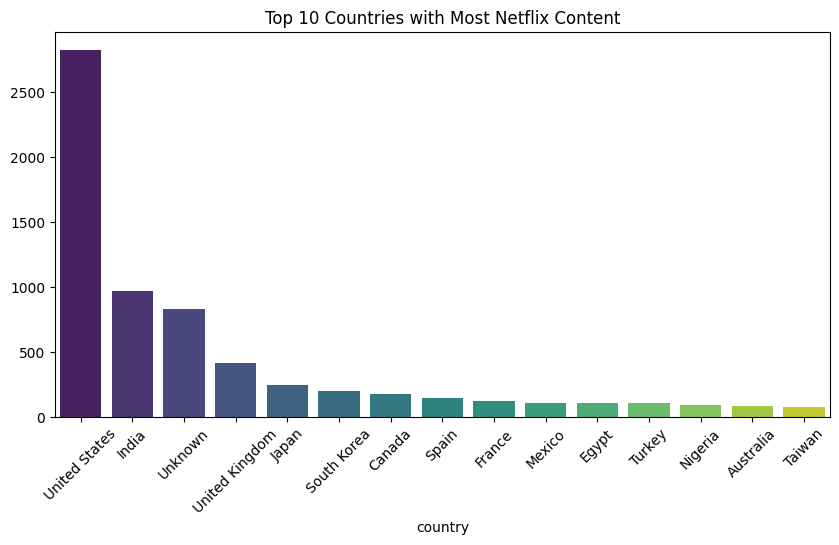

In [33]:
top_countries = df['country'].value_counts().head(15)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Most Netflix Content")
plt.show()


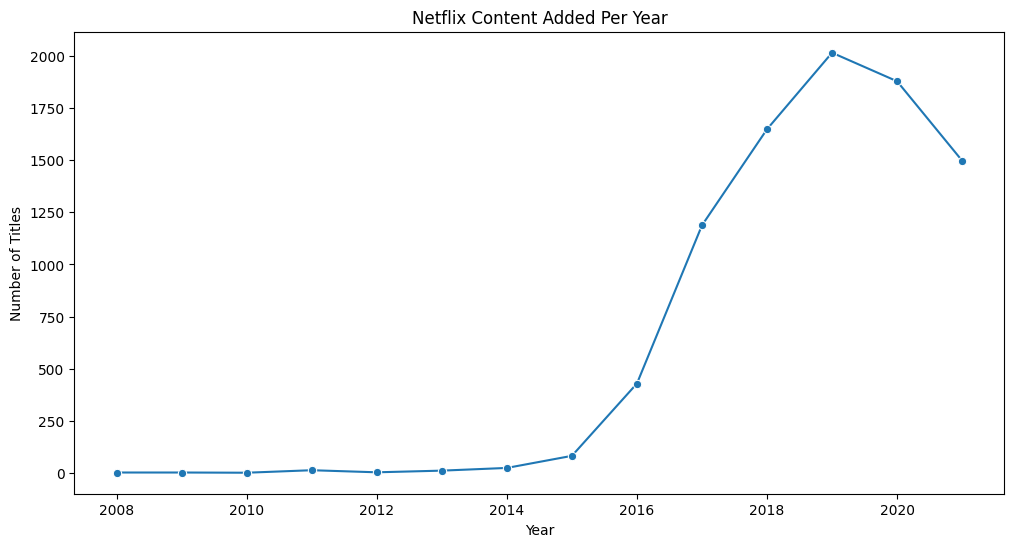

In [34]:
content_by_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o')
plt.title("Netflix Content Added Per Year")
plt.ylabel("Number of Titles")
plt.xlabel("Year")
plt.show()


C:\Users\SC\AppData\Local\Temp\ipykernel_2396\3078498133.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




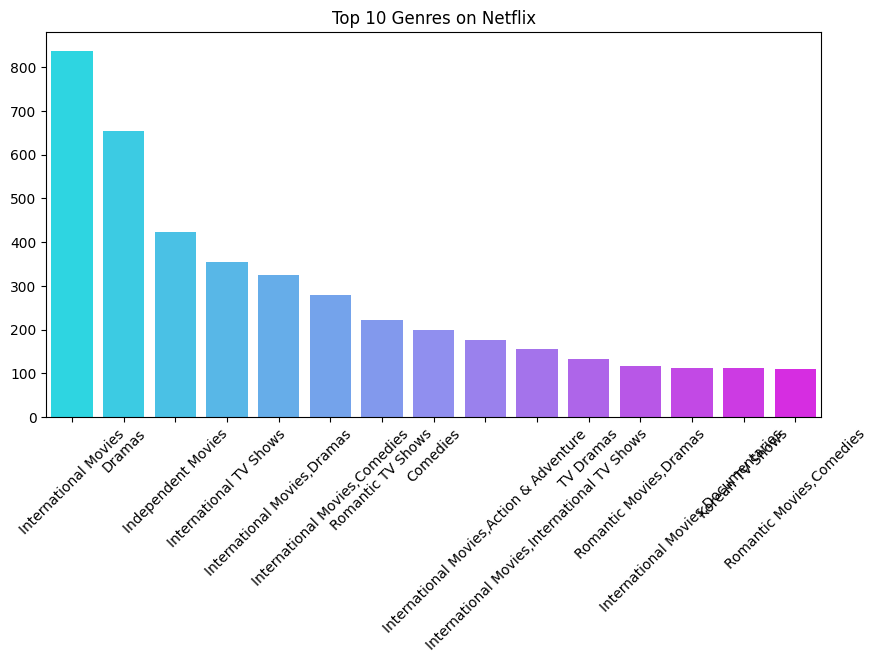

In [35]:
from collections import Counter

genres = ','.join(df['listed_in']).split(', ')
genre_counts = Counter(genres)

top_genres = genre_counts.most_common(15)

plt.figure(figsize=(10,5))
sns.barplot(x=[x[0] for x in top_genres], y=[x[1] for x in top_genres], palette='cool')
plt.title("Top 10 Genres on Netflix")
plt.xticks(rotation=45)
plt.show()


In [36]:
import plotly.express as px

fig = px.histogram(df, x='year_added', color='type', barmode='group',
                   title="Year-wise Content Added by Type")
fig.show()


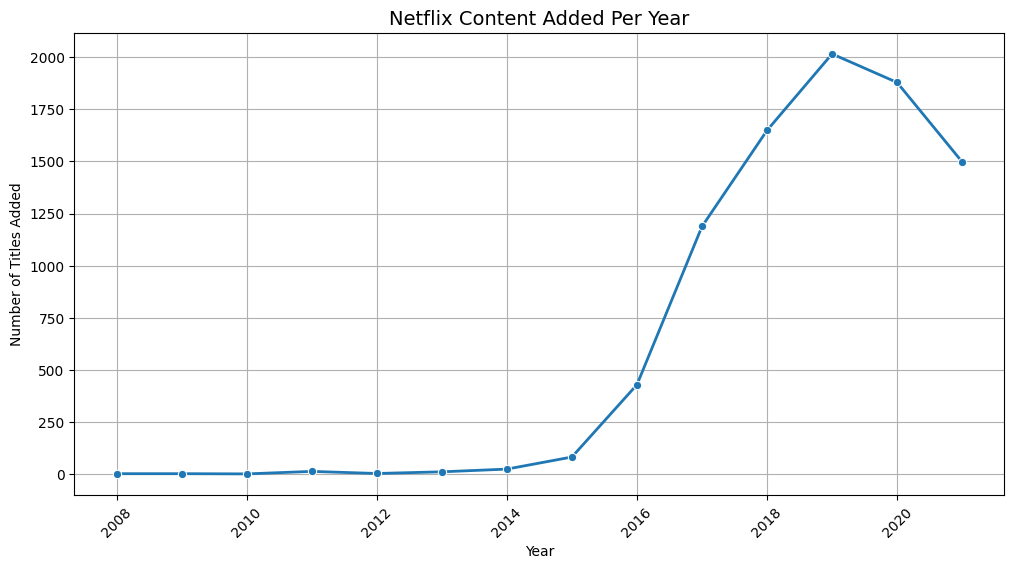

In [37]:
# Count content per year
content_by_year = df['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o', linewidth=2)
plt.title("Netflix Content Added Per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


C:\Users\SC\AppData\Local\Temp\ipykernel_2396\3480802047.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



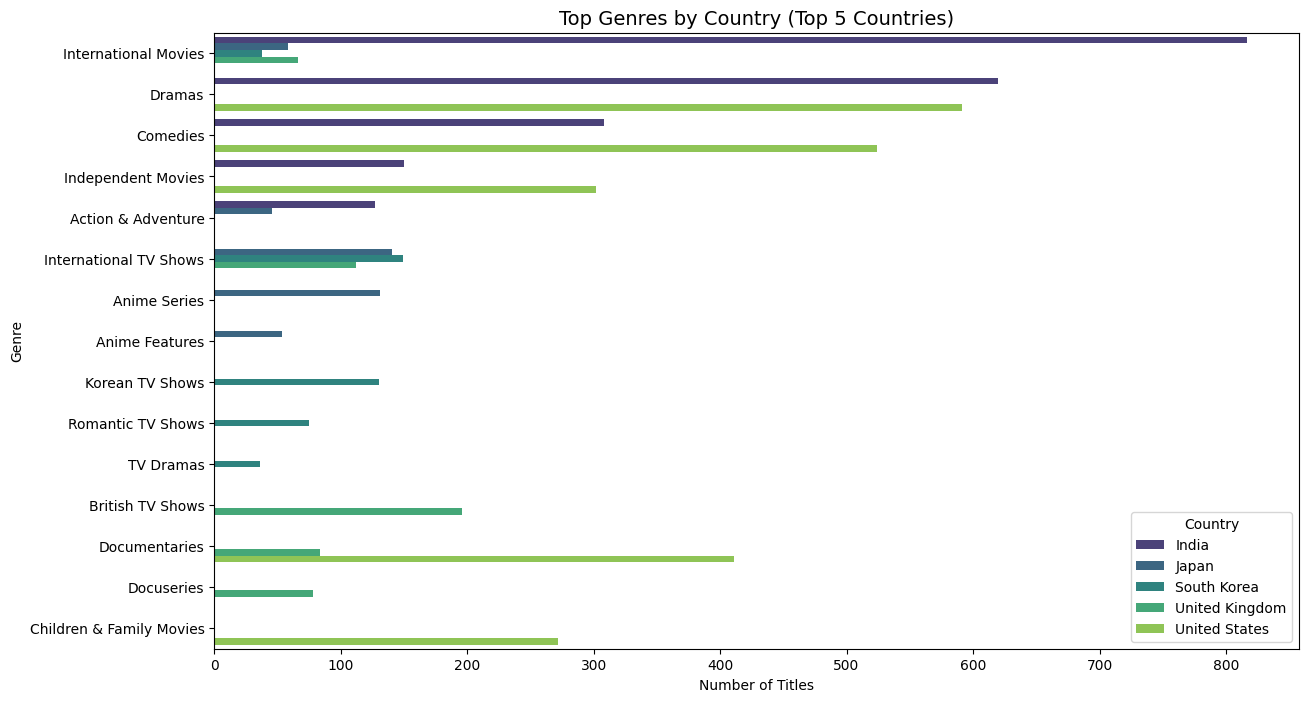

In [38]:
# Group by country and genre_list and count occurrences
genre_by_country = df_top.groupby(['country', 'genre_list']).size().reset_index(name='count')

# Sort by count and filter for top genres (if necessary)
top_genre_by_country = genre_by_country.groupby('country').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Plot
plt.figure(figsize=(14,8))
sns.barplot(x='count', y='genre_list', hue='country', data=top_genre_by_country, palette='viridis')
plt.title("Top Genres by Country (Top 5 Countries)", fontsize=14)
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.legend(title="Country")
plt.show()



In [39]:
import plotly.express as px

# Group by country and genre_list, then count occurrences
genre_by_country = df_top.groupby(['country', 'genre_list']).size().reset_index(name='count')

# Sort by count and filter for top genres (if necessary)
top_genre_by_country = genre_by_country.groupby('country').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# Plot using Plotly
fig = px.bar(top_genre_by_country, 
             x='count', 
             y='genre_list', 
             color='country', 
             title='Top Genres by Country (Top 5 Countries)',
             labels={'count': 'Number of Titles', 'genre_list': 'Genre'},
             orientation='h',  # Horizontal bar chart
             color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_layout(
    xaxis_title='Number of Titles',
    yaxis_title='Genre',
    legend_title='Country',
    showlegend=True
)

fig.show()


C:\Users\SC\AppData\Local\Temp\ipykernel_2396\3902244818.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

